\begin{center} by Ibis Prevedello (1794539) \end{center}

# Introduction

# Development

## Import necessary libraries for the project

In [1]:
# Difine libraries
from tqdm import tqdm
from textwrap import wrap

import os, os.path
import random
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# Set seed for random numbers
random.seed(1)

# Define folder where the log files are located
train_folder = 'training/'
test_folder = 'test/'

## Load data

In [16]:
# Dictionary with classes
dict_train = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lanciafino10m':6,
    'Lanciafino10mBianca':7,
    'Lanciafino10mMarrone':8,
    #'Lanciamaggioredi10mBianca':9,
    #'Lanciamaggioredi10mMarrone':10,
    'Motobarca':11,
    #'Motopontonerettangolare':12,
    #'MotoscafoACTV':13,
    'Mototopo':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccoltarifiuti':17,
    #'Sandoloaremi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'VaporettoACTV':21,
    #'VigilidelFuoco':22,
    'Water':23
    #'SnapshotBarcaParziale':24,
    #'SnapshotBarcaMultipla':25
}

dict_test = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lancia: fino 10 m':6,
    'Lancia: fino 10 m Bianca':7,
    'Lancia: fino 10 m Marrone':8,
    #'Lancia: maggiore di 10 m Bianca':9,
    #'Lancia: maggiore di 10 m Marrone':10,
    'Motobarca':11,
    #'Motopontone rettangolare':12,
    #'Motoscafo ACTV':13,
    'Mototopo':14,
    #'Mototopo corto':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccolta rifiuti':17,
    #'Sandolo a remi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'Vaporetto ACTV':21,
    #'Vigili del Fuoco':22,
    'Snapshot Acqua':23
    #'Snapshot Barca Parziale':24,
    #'Snapshot Barca Multipla':25
}

dict_test_inverse = dict((v,k) for k, v in dict_test.items())
print(dict_test_inverse)

{7: 'Lancia: fino 10 m Bianca', 8: 'Lancia: fino 10 m Marrone', 11: 'Motobarca', 14: 'Mototopo', 15: 'Patanella', 21: 'Vaporetto ACTV', 23: 'Snapshot Acqua'}


In [3]:
# Save data to file
def save_data(X, y, name):
    with open(name + '.p', 'wb') as f:
        pickle.dump({'features':X, 'labels':y}, f, pickle.HIGHEST_PROTOCOL)

# Load data from file
def load_data(name):
    with open(name + '.p', 'rb') as f:
        return pickle.load(f)

In [6]:
# List for files
X_train = list()
y_train = list()
    
# load training files
if os.path.isfile('training_augmented.p'):
    print('Training augmented file found!')
    with open('training_augmented.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
elif os.path.isfile('training.p'):
    print('Training file found!')
    with open('training.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
else:
    print('Training file not found!')

    for i in os.listdir(train_folder):
        subfolder = train_folder + i + "/"
        if os.path.isdir(subfolder):
            files = os.listdir(subfolder)

            # For each file
            if i in dict_train:
                for f in files:
                    image = cv2.resize(plt.imread(subfolder + f), (224,224), interpolation=cv2.INTER_LINEAR)
                    X_train.append(image)
                    y_train.append(dict_train[i])
            
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    # Save dictionary
    save_data(X_train, y_train, 'training')
    print('\nTraining saved to file!')

Training file not found!

Training saved to file!


In [11]:
# List for files
X_test = list()
y_test = list()
    
# load test files
if os.path.isfile('test.p'):
    print('Test file found!')
    with open('test.p', mode='rb') as f:
        test = pickle.load(f)
    X_test, y_test = test['features'], test['labels']
else:
    print('Test file not found!')

    test_label_dictionary = {}
    for l in open(test_folder + 'ground_truth.txt', 'r'):
        file, name = l.strip().split(';')
        test_label_dictionary[file] = name

    for f in os.listdir(test_folder):
        if f.endswith('.jpg') and test_label_dictionary[f] in dict_test:
            #image = plt.imread(test_folder + f)
            image = cv2.resize(plt.imread(test_folder + f), (224,224), interpolation=cv2.INTER_LINEAR)
            X_test.append(image)
            y_test.append(dict_test[test_label_dictionary[f]])

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Save dictionary
    save_data(X_test, y_test, 'test')
    print('\nTest saved to file!')

Test file not found!

Test saved to file!


In [12]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 4067
Number of testing examples = 1494
Image data shape = (224, 224, 3)
Number of classes = 7


# Visualize data

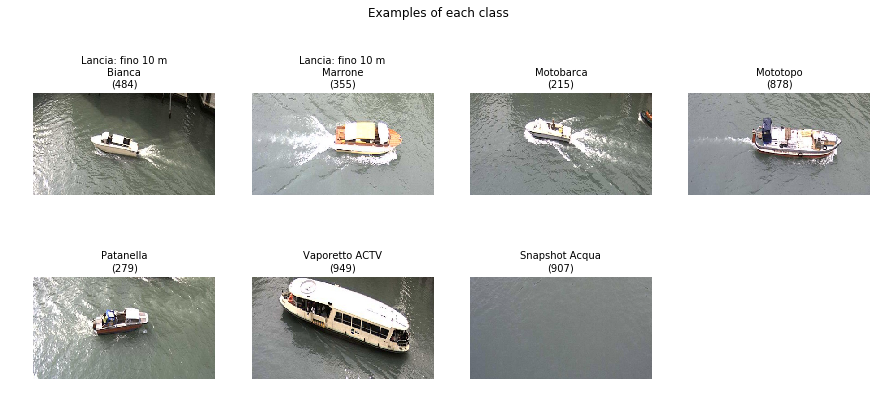

In [33]:
rows = 4
samples = list()

fig = plt.figure(facecolor="white")
fig.set_size_inches(15, 12)
fig.subplots_adjust(hspace=.8)

position = 0
for i in dict_train:
    position += 1
    index_dic = dict_train[i]
    count = sum(y_train == index_dic)
    index = random.choice(np.where(y_train == index_dic)[0])
    
    ax=fig.add_subplot(rows,rows,position, aspect='equal')        
    ax.imshow(X_train[index])
    ax.axis('off')
    ax.set_title("\n".join(wrap(dict_test_inverse[index_dic],20)) + "\n(" + str(count) + ")", fontsize = 10)
    ax.axis('tight')
plt.suptitle('Examples of each class')

In [41]:
## Plot number of each examples in the test data
#import collections

def plot_sample_class_distributions(samples, title):
    
    label_count = list()
    for i in dict_train:
        index_dic = dict_train[i]
        label_count.append((samples == index_dic).sum())

    indexes = np.arange(len(dict_test))

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(12, int(len(dict_train)/2))
    ax = fig.add_subplot(111)
    
    ax.barh(indexes, label_count, alpha=0.75)
    ax.axis([0, np.max(label_count)+10, -0.5, n_classes-0.4])
    ax.set_yticks(indexes)
    ax.set_yticklabels(dict_test, fontsize = 10)

    ax.set_ylabel('Boat Types', fontsize = 10)
    ax.set_xlabel('Number of Samples', fontsize = 10)
    ax.set_title(title, fontsize = 14)

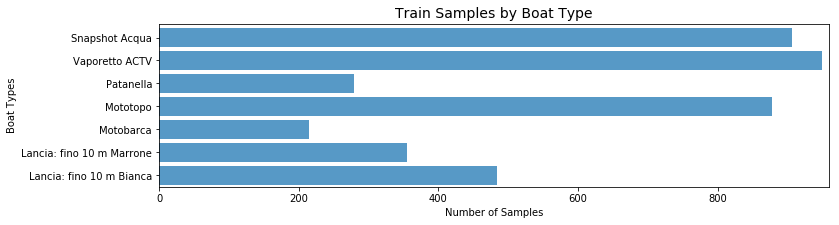

In [42]:
plot_sample_class_distributions(samples=y_train, title='Train Samples by Boat Type')

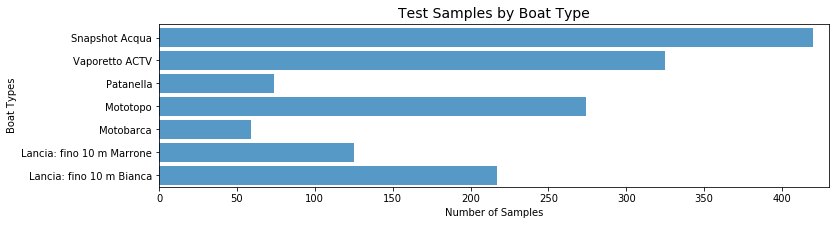

In [43]:
plot_sample_class_distributions(samples=y_test, title='Test Samples by Boat Type')

# Data Augmentation

In [44]:
def flip_image(img):
    if random.randint(0, 1):
        return cv2.flip(img, 1)
    else:
        return img

def brightness_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * (1 + np.random.uniform(-0.6, 0.2))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def rotate_image(img):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), random.uniform(-3, 3), 1)
    return cv2.warpAffine(img,M,(cols,rows), borderMode=1)

def translate_image(img, horz_range=30, vert_range=30):
    rows, cols, chs = img.shape
    tx = np.random.randint(-horz_range, horz_range+1)
    ty = np.random.randint(-vert_range, vert_range+1)
    tr_M = np.float32([[1,0,tx], [0,1,ty]])
    img = cv2.warpAffine(img, tr_M, (cols,rows), borderMode=1)
    return img

def shadow_image(img):
    rows, cols, chs = img.shape
    
    # Generate a separate buffer
    shadows = img.copy()

    randomUp = int(random.random() * cols)
    randomDown = int(random.random() * cols)
    
    if random.randint(0, 1):
        poly = [[randomUp,0],[cols,0],[cols,rows], [randomDown,rows]]
    else:
        poly = [[randomUp,0],[0,0],[0,rows], [randomDown,0]]
        
    cv2.fillPoly(shadows, np.array([poly]), -1)

    alpha = np.random.uniform(0.6, 0.9)
    return cv2.addWeighted(shadows, alpha, img, 1-alpha,0,img)

def shear_image(image, shear_range=200):
    if random.randint(0, 1):
        rows, cols, ch = image.shape
        dx = np.random.randint(-shear_range, shear_range + 1)
        random_point = [cols / 2 + dx, rows / 2]
        pts1 = np.float32([[0, rows], [cols, rows], [cols / 2, rows / 2]])
        pts2 = np.float32([[0, rows], [cols, rows], random_point])
        M = cv2.getAffineTransform(pts1, pts2)
        image = cv2.warpAffine(image, M, (cols, rows), borderMode=1)

    return image

Processing Patanella: 100%|██████████████████████████████████████████████████████████| 670/670 [05:20<00:00,  2.09it/s]
Processing Vaporetto ACTV: : 0it [00:00, ?it/s]
Processing Snapshot Acqua: 100%|███████████████████████████████████████████████████████| 42/42 [00:21<00:00,  1.98it/s]


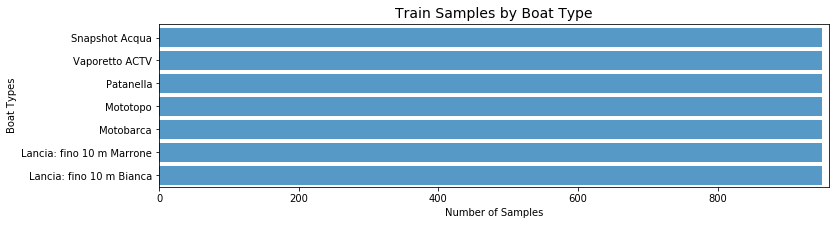

In [49]:
def augment_image(X, y):
    
    # Class with more samples
    n_max = 0
    for i in dict_train:
        index_dic = dict_train[i]
        n_max = max(n_max, (y == index_dic).sum())
    
    # Generate new random images
    for i in dict_train:
        index_dic = dict_train[i]
        n_actual = (y == index_dic).sum()
        n_class = n_max - n_actual
        
        if n_class != 0:
            index = [j for j,v in enumerate(y == index_dic) if v]

            indexes = [random.choice(index) for _ in range(n_class)]

            pbar = tqdm(range(n_class))
            pbar.set_description('Processing \'' + dict_test_inverse[index_dic] + '\'')

            for j in pbar:

                img = X[indexes[j]]

                img = flip_image(img)
                img = brightness_image(img)
                img = rotate_image(img)
                img = translate_image(img, horz_range=30, vert_range=30)
                img = shadow_image(img)

                X = np.vstack([X, np.reshape(img, [1, 224, 224, 3])])
                y = np.append(y, y[indexes[j]])
            
    return X, y

X_train, y_train = augment_image(X_train, y_train)

plot_sample_class_distributions(samples=y_train, title='Train Samples by Boat Type')

In [50]:
# Save dictionary
save_data(X_train, y_train, 'training_augmented')
print('Training augmented saved to file!')


Training saved to file!


In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Normalize the data features to the variable X_normalized
def normalize(data):
    a = -0.5
    b = 0.5
    xmin = np.min(data)
    xmax = np.max(data)

    return a + (data - xmin) * (b - a)/(xmax - xmin)

# One Hot encode the labels to the variable y_one_hot
from sklearn import preprocessing
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(y_test)